<a href="https://colab.research.google.com/github/JuanJRojas/IA-y-Minirobots-JJR-y-AFM/blob/main/Segunda%20Actividad/Tarea2IA%26Mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import requests
from PIL import Image
from io import BytesIO
import random
import pygame
import copy
## Configuracion pygame
from pygame.locals import (K_ESCAPE,KEYDOWN,QUIT)

pygame 2.6.0 (SDL 2.28.4, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


# TAREA IA 2
1. Observe sus comportamientos en la casa, en la universidad y en el medio de transporte que utiliza. Encuentre, para cada uno de estos escenarios sus reglas básicas.

2. En la librería de modelos de NetLogo, encuentre una aplicación de AC, describa el modelo, córralo y haga un análisis del resultado.

3. Imprima un AC 1D en una impresora 3D.

4. Tome el plano de una ciudad pequeña y localice, por ejemplo, las droguerías, ¿es posible que falte alguna en la ciudad? Utilice diagramas de Voronoi.

5. Con base en las aplicaciones, escoja una de ellas y realice la simulación. Abraham

#Solución del taller

### Solución del primer punto

####Reglas Básicas en cada escenario de mi vida (hogar, universidad, transporte) con enfoque en automatas celulares

| **Condición** | **Acción** |
|---------------|------------|
| **Hogar** | |
| Si es 7:00 am | La célula (persona) se despierta |
| Si es domingo por la mañana | La célula realiza la limpieza del cuarto |
| Si es domingo por la mañana | La célula lava la ropa |
| Si es domingo por la tarde | La célula limpia las áreas comunes (baño, cocina, sala) |
| Si es hora del desayuno, almuerzo o cena | La célula prepara la comida correspondiente |
| Si es día laboral y horario laboral (9:00 am - 5:00 pm) | La célula se dedica a estudiar o trabajar |
| Si es después de las 6:00 pm | La célula se dedica a actividades de ocio o descanso |
| Si hay otros miembros de la familia presentes | La célula interactúa socialmente (conversación, juegos, etc.) |
| Si es 11:00 pm | La célula se prepara para dormir y va a la cama |
| **Universidad** | |
| Si es martes o jueves y la hora es entre 11:00 am y 1:00 pm | La célula (persona) asiste a clase de IA |
| Si es martes o jueves y la hora es 1:00 pm | La célula se desplaza en bicicleta a casa y almuerza |
| Si es martes o jueves y la hora es entre 2:00 pm y 4:00 pm | La célula asiste a clases de manufactura aditiva |
| Si es martes o jueves y la hora es después de las 4:00 pm | La célula se desplaza a la biblioteca del CYT |
| **Transporte en Bicicleta** | |
| Si es hora de salir a la universidad | La célula (persona) saca la bicicleta del garaje común del edificio |
| Si la bicicleta está fuera del garaje | La célula pedalea durante 15 minutos hacia la universidad |
| Si han pasado 15 minutos de pedaleo y la célula llega a la universidad | La célula muestra el sticker que la identifica como estudiante para entrar |
| Si la célula ha ingresado a la universidad | La célula deja la bicicleta asegurada con candado en algún edificio de la universidad |

###Solución del segundo punto

Una de las posibles aplicaciones de los autómatas celulares se encuentra en los juegos. El ejemplo que se presenta a continuación es el del juego "Minesweeper" o busca minas. El código del juego que se encuentra en Net Logo se encuentra escrito a continuación:
```
globals [
  clock             ;; how many seconds the game has lasted so far
  game-started?     ;; initially false, becomes true when player first presses GO
  game-over?        ;; initially false, becomes true if the player loses
]
```
Primeramente se definen unas variables globales, estas son el reloj, que mide el tiempo que ha estado activo el juego, y los otros dos son booleanos que definen si el juego ha sido inicializado, o si el juego ha terminado.

```

breed [ grass-squares grass-square ]    ;; these are the green squares the player hasn't tested yet
breed [ mines mine ]             ;; the mines (initially invisible)
breed [ markers marker ]          ;; show where the player thinks mines are

```
A continuación se definen las "crías" o "breed", que determinan los nombres de una especie de clase y los nombres de los objetos dentro de esta, en este caso: "Cuadros de pasto", "minas" y "marcadores".

```

to setup
  clear-all
  set clock 0
  set game-started? false
  set game-over? false
  set-default-shape grass-squares "grass patch"
  set-default-shape mines "bomb"
  set-default-shape markers "bomb"
  ask patches [
    sprout-grass-squares 1 [ set color green ]
    set pcolor gray
  ]
  ;; make the number of mines determined by the mine-count slider
  ask n-of mine-count patches [
    sprout-mines 1 [
      set color black
      hide-turtle
    ]
  ]
  reset-ticks
end

```

Después se realiza el setup de las variables anteriormente creadas, dandoles un valor inicial, también se determinan los parámetros sobre los cuáles el jugador tiene poder, que es el número de minas en el juego.

```

to go
  if game-over? [
    ask markers with [any? mines-here] [ die ]
    ask markers [ set color gray  - 2 ]
    ask mines [ show-turtle ]
    set game-over? true
    ask patches [ set pcolor red ]
    stop
  ]
  if not game-started? [
    ;; this must be the first time through GO, so start the clock
    reset-timer
    set game-started? true
  ]
  set clock timer
  if all? grass-squares [any? mines-here] [
    ;; you win!!!
    ask mines [ show-turtle ]
    ask patches [ set pcolor blue ]
    stop
  ]
  if mouse-down? [
    ask patch (round mouse-xcor) (round mouse-ycor) [
      ifelse any? mines-here
        [ set game-over? true ]   ;; aiggghhhh!
        [ clear ]                 ;; whew!
    ]
  ]
  tick
end

```
En el anterior código se determina las acciones que se toman durante un juego, así como la lectura de las variables para que se desarrolle correctamente. A grandes razgos las cuatro funciones que se encuentran aquí son: ¿Está corriendo el juego?, ¿Ha empezado el juego?, Haz correr el reloj y ¿Haz presionado el mouse?

```

to clear  ;; patch procedure
  ask grass-squares-here [ die ]
  ask markers-here [ die ]
  let total count neighbors with [any? mines-here]
  ifelse total > 0
    [ set plabel total ]
    ;; if none of our neighbors have mines on them, then they can
    ;; be cleared too, to save the user from extra clicking
    [ ask neighbors with [any? grass-squares-here]
      [ clear ] ]
end

```

Posteriormente se define la función que hace uso de los autómatas celulares, esta determina, según las celulas adyacentes, o vecinos, de la célula presionada
y sus estados, si se puede generar un "patch" o traducido libremente como "parcela", para librerar todos los espacios contiguos cuyos vecinos no tengan minas

```

to mark/unmark
  if not mouse-inside? [ stop ]
  ask patch round mouse-xcor round mouse-ycor [
    if any? grass-squares-here [
      ifelse any? markers-here
        [ ask markers-here [ die ] ]
        [ sprout-markers 1 [ set color black ] ]
    ]
  ]
end
; Copyright 2005 Uri Wilensky.
```

La última función comprende la función para marcar una celda con otro estado de "marcado", para definir que en este se encuentra una mina.

El resultado es un juego de buscaminas que permite un rápido desarrollo por el despeje automatizado de lugares sin minas adyacentes, no obstante, es posible modificarlo para hacerlo más rápido, al leer los estados con minas marcadas también, para así considerarlos como espacios "sin minas" adyacentes y permitir liberar múltiples espacios a la vez, aunque estos sólo comprendan los vecinos a la celda que se está evaluando.

![MinesweeperIA](https://drive.google.com/uc?id=1K6MQSN-gqPieVkGP4cyyow2kd9QLimLY)

###Solución del tercer punto

In [ ]:
#Punto 3 (Abraham)

###Solución del cuarto punto

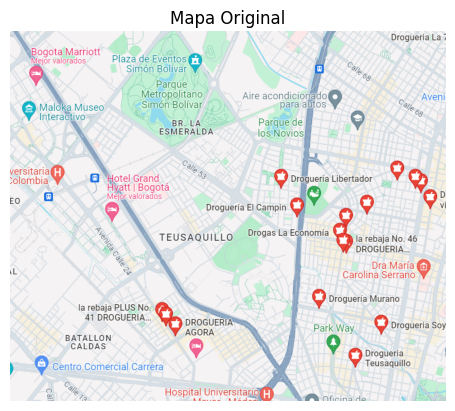

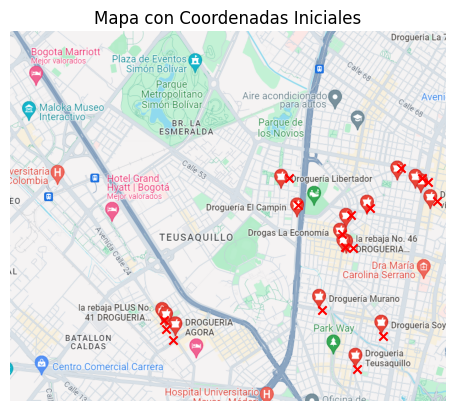

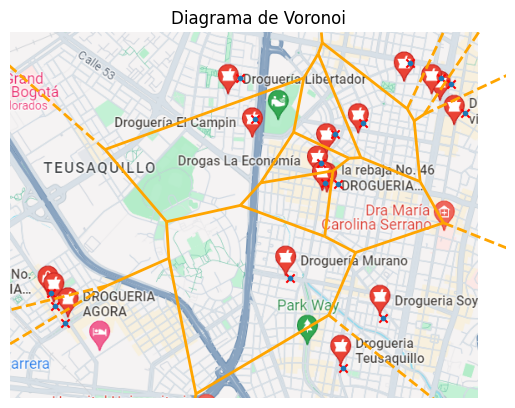

In [ ]:
#Punto 4 (Juan)

# Cargar la imagen
image_url='https://drive.google.com/uc?id=1cimrqik8klEW3L30vZoUUaQANnMACmhq'
response = requests.get(image_url)
if response.status_code == 200:
    try:
        # Verificar el tipo de contenido
        if 'image' in response.headers['Content-Type']:
            image_data = BytesIO(response.content)
            image = Image.open(image_data)
            image.show()
        else:
            print("Error: El contenido descargado no es una imagen.")
    except Exception as e:
        print(f"Error al abrir la imagen: {e}")
else:
    print("Error al descargar la imagen.")

# Convertir la imagen a un array de NumPy
image_array = np.array(image)

# Mostrar la imagen
plt.imshow(image_array)
plt.title('Mapa Original')
plt.axis('off')
plt.show()

# Coordenadas iniciales
initial_coords =(np.array([[170,292],[172,300],[178,310],[283,163],[292,188],[313,283],[332,214],[340,197],[334,226],[342,227],[357,190],[345,337],[369,307],[385,154],[404,163],[410,167],[418,184]])-30)*2

# Mostrar la imagen con las coordenadas iniciales marcadas
plt.imshow(image_array)
plt.scatter(initial_coords[:, 0], initial_coords[:, 1], c='red', marker='x')
plt.title('Mapa con Coordenadas Iniciales')
plt.axis('off')
plt.show()

# Generar el diagrama de Voronoi
vor = Voronoi(initial_coords)

# Función para mostrar el diagrama de Voronoi sobre la imagen
def plot_voronoi(image_array, vor):
    fig, ax = plt.subplots()
    ax.imshow(image_array)
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=2)
    ax.scatter(vor.points[:, 0], vor.points[:, 1], c='red', marker='x')
    plt.gca().invert_yaxis()
    plt.title('Diagrama de Voronoi')
    plt.axis('off')
    plt.show()

# Mostrar el diagrama de Voronoi
plot_voronoi(image_array, vor)


## Solución del quinto punto: simulación de propagación de Incendios Forestales

Este modelo simula cómo se propaga un incendio forestal a través de una cuadrícula. Cada célula puede estar en uno de tres estados: árbol, fuego o vacío.

### Estados de Cada Celda

1. **Celda Vacía (0)**
   - **Descripción**: Representa una celda que no contiene ningún árbol ni está en llamas.
   - **Estado**: `0`
   - **Condición Inicial**: Algunas celdas pueden estar vacías desde el inicio, determinadas por la probabilidad `p_arbol`.
   - **Transición**: Una celda que estuvo en llamas (estado `2`) se convierte en una celda vacía después de que el fuego se apaga.

2. **Celda con Árbol (1)**
   - **Descripción**: Representa una celda que contiene un árbol que aún no ha sido afectado por el fuego.
   - **Estado**: `1`
   - **Condición Inicial**: Una fracción de las celdas se inicializan con árboles, determinadas por la probabilidad `p_arbol`.
   - **Transición**: Si una celda vecina está en llamas (estado `2`), esta celda puede pasar a estar en llamas (estado `2`).

3. **Celda en Llamas (2)**
   - **Descripción**: Representa una celda que contiene un árbol que está actualmente en llamas.
   - **Estado**: `2`
   - **Condición Inicial**: Una pequeña fracción de las celdas puede estar en llamas desde el inicio, determinada por la probabilidad `p_fuego`.
   - **Transición**: Una celda en llamas se convierte en una celda vacía (estado `0`) en el siguiente paso de tiempo y puede propagar el fuego a las celdas vecinas que contienen árboles (estado `1`).

<ipython-input-4-d824170ee15b>:63: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=20.
  animacion = animation.FuncAnimation(figura, actualizar, fargs=(img, cuadricula, tamano_cuadricula), frames=20, interval=100, save_count=50)


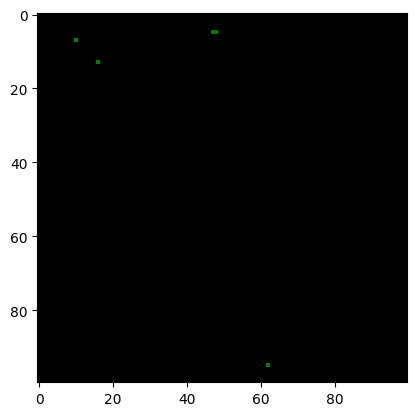

In [ ]:




import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.colors import ListedColormap

# Configuración inicial de la cuadricula y probabilidades
tamano_cuadricula = 100
p_arbol = 0.6  # Probabilidad de que una celda sea un árbol
p_fuego = 0.01  # Probabilidad de que una celda esté en llamas inicialmente

# Generar la cuadrícula inicial
# Crear una matriz del mismo tamaño que la cuadrícula, donde cada celda tiene una probabilidad 'p_arbol' de ser un árbol (1) y una probabilidad '1 - p_arbol' de estar vacía (0). Esto genera la distribución inicial de árboles en la cuadrícula.
cuadricula = np.random.choice([0, 1], size=(tamano_cuadricula, tamano_cuadricula), p=[1 - p_arbol, p_arbol])

# Crear una matriz del mismo tamaño que la cuadrícula, donde cada celda tiene una probabilidad 'p_fuego' de estar en llamas (1) y una probabilidad '1 - p_fuego' de no estar en llamas (0). Esto genera la distribución inicial de celdas en llamas.
fuego = np.random.choice([0, 1], size=(tamano_cuadricula, tamano_cuadricula), p=[1 - p_fuego, p_fuego])

# Actualizar la cuadrícula inicial para reflejar las celdas en llamas:
# busca en la matriz 'fuego' todas las celdas que están en llamas
# Para cada celda en llamas en 'fuego', actualiza la celda correspondiente en 'cuadricula' para que esté en llamas (estado 2).
# Las celdas que no están en llamas permanecen sin cambios en 'cuadricula'.
cuadricula = np.where(fuego == 1, 2, cuadricula)

# Definir un mapa de colores personalizado
cmap = ListedColormap(['black', 'green', 'red'])  # Vacío, Árbol, Fuego

def actualizar(frameNum, img, cuadricula, tamano_cuadricula):
    # Crear una copia de la cuadrícula actual para almacenar el nuevo estado
    nuevaCuadricula = cuadricula.copy()

    # Iterar sobre cada celda de la cuadrícula
    for i in range(tamano_cuadricula):
        for j in range(tamano_cuadricula):
            # Verificar si la celda está en llamas (estado 2)
            if cuadricula[i, j] == 2:  # Si la célula está en llamas
                nuevaCuadricula[i, j] = 0  # La célula se convierte en vacío

                # Iterar sobre los vecinos de la celda actual (8 vecinos posibles)
                for di in [-1, 0, 1]:
                    for dj in [-1, 0, 1]:
                        # Asegurar que no se verifique la celda central (di=0 y dj=0)
                        if (di != 0 or dj != 0):
                           # Calcular las coordenadas de las celdas vecinas, considerando los límites de la cuadrícula
                            ni, nj = (i + di) % tamano_cuadricula, (j + dj) % tamano_cuadricula
                            # Verificar si la celda vecina contiene un árbol (estado 1)
                            if cuadricula[ni, nj] == 1:
                              # Si la celda vecina contiene un árbol, se marca como en llamas (estado 2)
                                nuevaCuadricula[ni, nj] = 2  # El fuego se propaga a los árboles adyacentes

    # Actualizar la imagen con el nuevo estado de la cuadrícula
    img.set_data(nuevaCuadricula)
    # Copiar el nuevo estado de vuelta a la cuadrícula original
    cuadricula[:] = nuevaCuadricula[:]
    # Devolver la imagen actualizada
    return img,

# Crear una figura y un conjunto de ejes para la visualización
figura, ejes = plt.subplots()
# Mostrar la cuadrícula inicial en la figura usando el mapa de colores personalizado
img = ejes.imshow(cuadricula, interpolation='nearest', cmap=cmap)
# Configurar la animación
animacion = animation.FuncAnimation(figura, actualizar, fargs=(img, cuadricula, tamano_cuadricula), frames=20, interval=100, save_count=50)

# Mostrar la animación en Google Colab
HTML(animacion.to_jshtml())
